# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Santiago Ramirez Saldana

Datum: 17/11/2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie beeinflusst die Zugabe von warmem Wasser in einen Behälter mit kaltem Wasser die resultierende Mischungstemperatur, und wie kann die Wärmekapazität des Behälters mit kaltem Wasser anhand dieser Mischung ermittelt werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


![Heat_Capacity.jpg](figures/Heat_Capacity.jpg)

Der Versuch wurde gemäß den Anweisungen der Aufgabenstellung an meinem Schreibtisch durchgeführt. Die für das Experiment benötigten Gegenstände sind eine Tasse, eine Schüssel und die Sensoren zur Messung der Temperatur. Zu Beginn des Experiments wird ein Sensor in die Schüssel mit heißem Wasser und der andere Sensor in die Tasse mit kaltem Wasser gelegt. Nach einer Weile wird das kalte Wasser in das heiße Wasser gegossen und die beiden Sensoren werden in die Schüssel gelegt. Danach messen die Sensoren die Temperaturveränderung und nach einiger Zeit ist das Experiment beendet.

## Versuchsauswertung

In [26]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
#plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [1]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
import h5py as h5
path =  '/home/jovyan/work/calorimetry_home/archiv/Heat_capacity_Experiment/Heat_capacity_Experiment.h5'
# DONE #

In [2]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

dataset = h5.File(path, "r")
    
author = dataset.attrs["authors"]
created = dataset.attrs["created"]
experiment = dataset.attrs["experiment"]
group_number= dataset.attrs["group_number"]
    
keys = list(dataset['RawData'].keys())
print(keys)
temperature_1 = dataset['RawData'][keys[0]]['temperature'][()]
print(temperature_1)
temperature_2 = dataset['RawData'][keys[1]]['temperature'][()]
print(temperature_2)
timestamp_1 = dataset['RawData'][keys[0]]['timestamp'][()]
timestamp_2 = dataset['RawData'][keys[1]]['timestamp'][()]
print(timestamp_1)
print(timestamp_2)


dataset.close()
# DONE #

['1ee7d8b5-89ef-698d-b53c-47a54e651099', '1ee7d8cb-01f3-6155-bf64-7d793842269d']
[55.1875 55.     55.     49.875  47.75   46.375  45.375  44.6875 44.6875
 43.625  43.1875 42.875  42.625  42.375  42.1875 42.0625 41.875  41.75
 41.6875 41.5625 41.5625 41.375  41.3125 41.1875 41.1875 41.125  41.0625
 41.     41.     41.     41.     40.9375 40.875  40.875  40.875  40.8125
 40.8125 40.8125 40.8125 40.8125 40.75   40.75   40.6875 40.6875 40.625
 40.5625 40.5    40.4375 40.5    40.4375 40.4375 40.375  40.3125 40.3125
 40.3125 40.3125 40.3125 40.1875 40.1875 40.125  40.0625 40.0625 40.
 40.     40.     40.     39.9375 39.9375 39.875  39.875  39.8125 39.8125
 39.8125 39.75   39.8125 39.75   39.6875 39.6875 39.6875 39.625  39.625
 39.5625 39.5   ]
[21.5    23.125  27.9375 27.9375 32.1875 33.5    34.5625 35.375  36.0625
 36.8125 37.4375 37.4375 38.375  38.6875 38.875  39.125  39.25   39.4375
 39.4375 39.4375 39.8125 39.9375 40.     40.125  40.1875 40.1875 40.1875
 40.25   40.25   40.25   40.1875 

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in Grad Celsius')

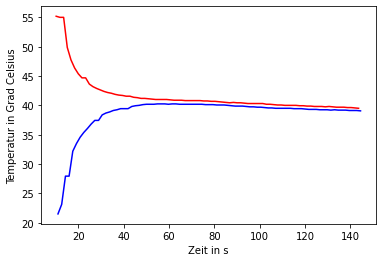

In [29]:
# TODO: Use the temperature and time data for plotting
plt.plot(timestamp_1,temperature_1, color = 'red')
plt.plot(timestamp_2,temperature_2, color = 'blue')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in Grad Celsius")

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [30]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

metadata = m_json.get_metadata_from_setup('/home/jovyan/work/calorimetry_home/datasheets/setup_heat_capacity.json')
print(metadata)
UUID_probe = metadata['probe']['UUID'][0]

m_cup = m_json.get_json_entry('datasheets', UUID_probe, ['probe', 'metadata', 'masse_1'])
m_cup = float(m_cup)
m_add = m_json.get_json_entry('datasheets', UUID_probe, ['probe', 'metadata', 'masse_2'])
m_add = float(m_add)

# DONE #

{'group_info': {'UUID': ['1ee7d8f6-f7b7-6bcd-8f41-b78fc3451840'], 'name': ['group_info']}, 'instrument': {'UUID': ['1ee7d8f7-f956-67f2-827b-52e9f3fe864d'], 'name': ['raspberry_pi']}, 'sensor': {'UUID': ['1ee7d8b5-89ef-698d-b53c-47a54e651099', '1ee7d8cb-01f3-6155-bf64-7d793842269d'], 'name': ['temperature_cup_1', 'temperature_cup_2']}, 'probe': {'UUID': ['1ee7d8fc-839f-61ec-93cd-e03dbbd99190'], 'name': ['probe_description']}, 'choose your own type, if you miss one': {'UUID': ['add_more_here_if_you_need'], 'name': ['']}}


#### (iV) Anfangs- und Endwert der Temperatur

In [31]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_1 = temperature_1[0]
T_2 = temperature_2[0]
T_M = (temperature_1[-1]+temperature_2[-1])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [32]:
# TODO: Calculate heat capacity of the calorimeter
C = (m_add*water_heat_capa*(T_2-T_M)/(T_M-T_1))-(m_cup*water_heat_capa)

# DONE #

#### (Vi) Ergebnis

In [33]:
# TODO: Print result
print(str(C) +' KJ/K')

# DONE #

0.04927308447937129 J/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität von Wasser wird mit 4,19 KJ/K angegeben, der von mir berechnete Wert liegt jedoch bei 0,049 KJ/K. Wie Sie sehen können, gibt es einen erheblichen Unterschied zwischen diesen beiden Zahlen. Daher kann man sagen, dass der gemessene Wert für weitere Experimente nicht geeignet ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Nach dem Experiment konnte ich die Funktionsweise der Temperatursensoren besser verstehen, und ich konnte auch die Funktionsweise der Json-Dateien besser verstehen. Das Experiment selbst gibt uns ein besseres Verständnis dafür, wie die Temperatur funktioniert und wie sie immer dazu neigt, ein Gleichgewicht aufrechtzuerhalten. Wie in der Grafik zu sehen ist, fällt die Temperatur im Moment des Mischens stark ab bzw. steigt im Falle des Sensors in der Schüssel mit kaltem Wasser stark an. Dies geschieht so lange, bis ein Zwischenpunkt zwischen den beiden Temperaturen gefunden wird. Was die berechnete Wärmekapazität betrifft, so weicht sie erheblich von der realen ab. Dies bedeutet nicht direkt, dass das Experiment nicht funktioniert oder falsch ist, sondern kann auf Faktoren wie die Umgebung oder den Zeitpunkt des Experiments zurückzuführen sein. Dies lehrt mich, dass es nicht ausreicht, das Experiment einmal durchzuführen, sondern dass es notwendig ist, es mehrmals zu wiederholen und miteinander zu vergleichen, um zuverlässige Ergebnisse zu erhalten.